# Exercise: classification on Cifar10 dataset with TensorFlow

**a. Building DNN with 20 hidden layers with 100 neurons (too many, but that's the point of the exercise).**

In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

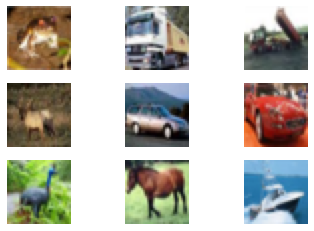

In [3]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
    plt.axis("off")
plt.show()

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3])
])
for layer in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

**b. Using Nadam optimizer and early stopping and then fitting the model to cifar10.**

In [11]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [2]:
run_index = 1 # zwiększa tę wartość w każdym przebiegu
run_logdir = os.path.join(os.curdir, "moje_dzienniki_cifar10", "przebieg_{:03d}".format(run_index))
run_logdir

'.\\moje_dzienniki_cifar10\\przebieg_001'

In [3]:
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok = True)

In [5]:
%reload_ext tensorboard

In [6]:
%tensorboard --logdir ./moje_dzienniki_cifar10

Reusing TensorBoard on port 6006 (pid 5928), started 14:14:07 ago. (Use '!kill 5928' to kill it.)

In [13]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_1.h5", save_best_only = True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=200, validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb, tensorboard_cb])

Epoch 1/200
1407/1407 [==============================] - 15s 8ms/step - loss: 2.2919 - accuracy: 0.1873 - val_loss: 1.8835 - val_accuracy: 0.3260
Epoch 2/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8803 - accuracy: 0.3177 - val_loss: 1.8723 - val_accuracy: 0.3146
Epoch 3/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8044 - accuracy: 0.3442 - val_loss: 1.7853 - val_accuracy: 0.3342
Epoch 4/200
1407/1407 [==============================] - 11s 8ms/step - loss: 1.7501 - accuracy: 0.3637 - val_loss: 1.8048 - val_accuracy: 0.3770
Epoch 5/200
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6974 - accuracy: 0.3904 - val_loss: 2.1676 - val_accuracy: 0.3014
Epoch 6/200
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6682 - accuracy: 0.4001 - val_loss: 1.7430 - val_accuracy: 0.3680
Epoch 7/200
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6320 - accuracy: 0.4166 - val_loss: 1.6374 -

**Adding Batch Normalization and comparing learning rates**

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3])
])

for layer in range(20):
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
    
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [11]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_1.h5", save_best_only = True)
#tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=200, validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

Epoch 1/200
1407/1407 [==============================] - 25s 12ms/step - loss: 2.0581 - accuracy: 0.2678 - val_loss: 1.7256 - val_accuracy: 0.3886
Epoch 2/200
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7268 - accuracy: 0.3857 - val_loss: 1.6619 - val_accuracy: 0.4076
Epoch 3/200
1407/1407 [==============================] - 19s 14ms/step - loss: 1.6630 - accuracy: 0.4107 - val_loss: 1.5935 - val_accuracy: 0.4276
Epoch 4/200
1407/1407 [==============================] - 20s 14ms/step - loss: 1.6123 - accuracy: 0.4260 - val_loss: 1.5289 - val_accuracy: 0.4692
Epoch 5/200
1407/1407 [==============================] - 19s 14ms/step - loss: 1.5557 - accuracy: 0.4497 - val_loss: 1.5019 - val_accuracy: 0.4704
Epoch 6/200
1407/1407 [==============================] - 19s 14ms/step - loss: 1.5294 - accuracy: 0.4567 - val_loss: 1.4920 - val_accuracy: 0.4664
Epoch 7/200
1407/1407 [==============================] - 19s 14ms/step - loss: 1.4750 - accuracy: 0.4820 - val_loss: 1

**d. Using SELU activation function instead of batch normalization**

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3])
])

initializer = tf.keras.initializers.LecunNormal()

for layer in range(20):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer=initializer))
    
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

Input data should be standarized:

In [17]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [18]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_1.h5", save_best_only = True)
#tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train_scaled, y_train, epochs=200, validation_data = (X_valid_scaled, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

Epoch 1/200
1407/1407 [==============================] - 13s 7ms/step - loss: 2.0575 - accuracy: 0.3216 - val_loss: 1.7010 - val_accuracy: 0.3624
Epoch 2/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6591 - accuracy: 0.3913 - val_loss: 1.7105 - val_accuracy: 0.3510
Epoch 3/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6084 - accuracy: 0.4103 - val_loss: 1.6396 - val_accuracy: 0.4098
Epoch 4/200
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5683 - accuracy: 0.4269 - val_loss: 1.7028 - val_accuracy: 0.4018
Epoch 5/200
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5561 - accuracy: 0.4391 - val_loss: 1.6788 - val_accuracy: 0.3906
Epoch 6/200
1407/1407 [==============================] - 12s 8ms/step - loss: 1.9067 - accuracy: 0.4196 - val_loss: 1.7053 - val_accuracy: 0.3872
Epoch 7/200
1407/1407 [==============================] - 12s 8ms/step - loss: 1.5659 - accuracy: 0.4296 - val_loss: 1.6508 -

Model is - gently saying - bad. Let's check is it misbehaviour of optimizer.

In [19]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
initializer = tf.keras.initializers.LecunNormal()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3])
])
for layer in range(20):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer=initializer))
    
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [21]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_1.h5", save_best_only = True)
#tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train_scaled, y_train, epochs=200, validation_data = (X_valid_scaled, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

Epoch 1/200
1407/1407 [==============================] - 6s 4ms/step - loss: 2.1527 - accuracy: 0.2347 - val_loss: 1.8167 - val_accuracy: 0.3154
Epoch 2/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7722 - accuracy: 0.3693 - val_loss: 1.7248 - val_accuracy: 0.3938
Epoch 3/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6664 - accuracy: 0.4075 - val_loss: 1.6418 - val_accuracy: 0.4208
Epoch 4/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5936 - accuracy: 0.4432 - val_loss: 1.6024 - val_accuracy: 0.4328
Epoch 5/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5371 - accuracy: 0.4575 - val_loss: 1.6004 - val_accuracy: 0.4374
Epoch 6/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.4983 - accuracy: 0.4728 - val_loss: 1.6007 - val_accuracy: 0.4358
Epoch 7/200
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4595 - accuracy: 0.4912 - val_loss: 1.6082 - val_ac

**e. Regularization with alpha dropout.**

In [30]:
keras.backend.clear_session()

In [37]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.AlphaDropout(rate=0.2)
])

for layer in range(20):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

model.add(keras.layers.AlphaDropout(rate=0.2))
model.add(keras.layers.Dense(10, activation="softmax"))

In [38]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [39]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_1.h5", save_best_only = True)
#tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train_scaled, y_train, epochs=200, validation_data = (X_valid_scaled, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

Epoch 1/200
1407/1407 [==============================] - 16s 9ms/step - loss: 2.1300 - accuracy: 0.2359 - val_loss: 1.9233 - val_accuracy: 0.2878
Epoch 2/200
1407/1407 [==============================] - 14s 10ms/step - loss: 1.8428 - accuracy: 0.3386 - val_loss: 1.8745 - val_accuracy: 0.3240
Epoch 3/200
1407/1407 [==============================] - 16s 11ms/step - loss: 1.7812 - accuracy: 0.3699 - val_loss: 1.9941 - val_accuracy: 0.3566
Epoch 4/200
1407/1407 [==============================] - 16s 11ms/step - loss: 1.7246 - accuracy: 0.3849 - val_loss: 1.7680 - val_accuracy: 0.3734
Epoch 5/200
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6919 - accuracy: 0.3956 - val_loss: 1.8599 - val_accuracy: 0.3724
Epoch 6/200
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6766 - accuracy: 0.4035 - val_loss: 1.7587 - val_accuracy: 0.4038
Epoch 7/200
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6219 - accuracy: 0.4246 - val_loss: 1.